In [1]:
import pandas as pd
import nltk
nltk.download()
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = 't8.shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [3]:
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

print(w.wv.most_similar('thou'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

[('art', 0.7934582233428955), ('thyself', 0.7812620997428894), ('villain', 0.7454213500022888), ('dost', 0.731303870677948), ('wilt', 0.7068836092948914), ('wherefore', 0.7014361023902893), ('hast', 0.6929329037666321), ('didst', 0.6912087798118591), ('wouldst', 0.6849916577339172), ('slave', 0.6739818453788757)]
(12176, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.407474,0.093009,0.250463,0.442316,-0.439112,-0.614264,0.305986,0.639060,-0.305671,-0.279236,...,-0.143139,0.117882,-0.078401,-0.315821,0.835005,0.536319,-0.457977,-0.386189,0.018214,-0.217659
thy,-0.312993,0.218019,0.131909,0.469965,0.039140,-0.300223,0.227514,0.243125,-0.205414,-0.712995,...,0.033244,0.161439,-0.178245,-0.385706,0.406833,0.393315,-0.097679,-0.378214,-0.190628,0.141226
shall,-0.139824,0.250166,-0.030923,0.246821,0.417419,-0.404051,0.079598,0.705909,-0.206090,0.013286,...,0.264832,-0.102334,0.227872,0.057902,0.629007,0.264627,0.014893,0.023829,-0.341041,-0.155990
thee,-0.195694,0.309208,0.082637,0.332947,0.197271,-0.491376,0.273617,0.772345,-0.268919,-0.619042,...,-0.160478,0.107512,0.117372,-0.192045,0.725020,0.029230,-0.285438,-0.528753,-0.196572,-0.269872
lord,-0.076878,-0.075483,-0.251321,0.146980,0.073580,-0.203181,-0.069110,0.612971,-0.490325,-0.494283,...,0.102814,-0.211240,0.380178,-0.225283,0.516023,-0.356062,0.612553,-0.093841,-0.298016,-0.077244


[]

<Figure size 432x288 with 0 Axes>

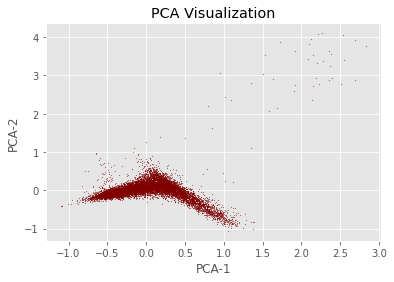

In [4]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()